# Homework 3

January 21, 2021

### 1.	Using the data from the perceptual learning experiment (percep_learn.csv) and from the Margarine study, carry out a gls analyses: (treating ‘trial’ and ‘time’ as factors.). Then treat ‘trial’ and ‘time’ as continuous variables and conduct a linear mixed models.

In [2]:
library(car)
library(ez)
library(tidyr)
library(nlme)
library(lme4)
library(lmerTest)
library(lattice)

Loading required package: carData
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘lme4’

The following object is masked from ‘package:nlme’:

    lmList


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



#### Perceptual Learning

In [3]:
plearn = read.csv('data_files/percep_learn.csv')
plearn$trial = as.factor(plearn$trial)
head(plearn)

subj,trial,group,per_corr
1,1,1,48.03634
1,2,1,57.01418
1,3,1,60.78102
1,4,1,71.94232
1,5,1,77.94697
2,1,1,43.86001


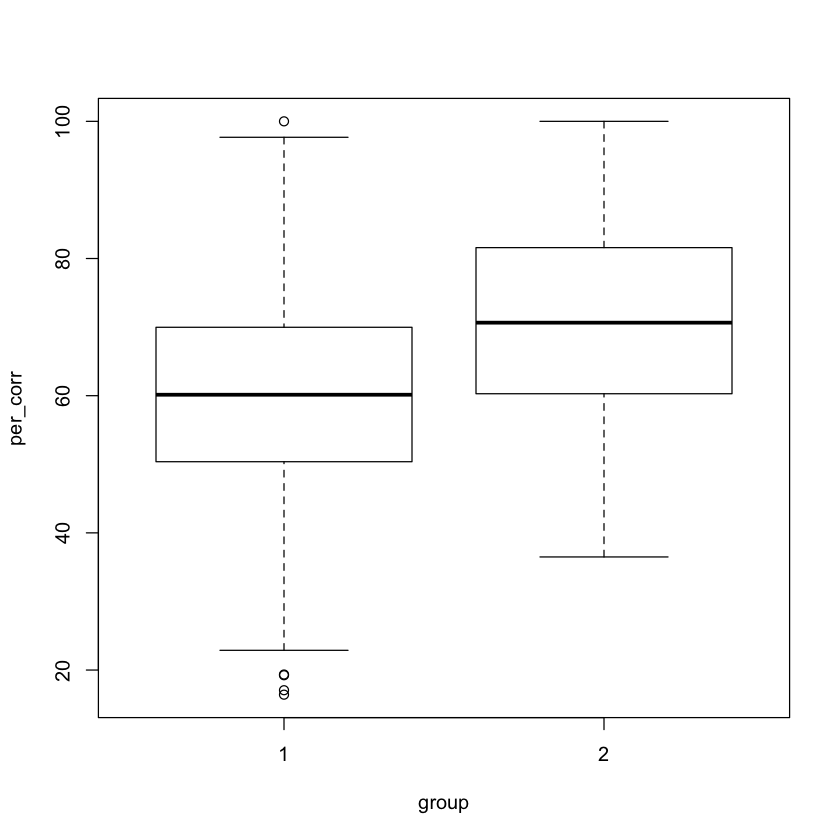

In [4]:
boxplot(per_corr ~ group, data=plearn)

In [6]:
# look at covariance structure across trials

# convert to wide data
plw <- spread(plearn, trial, per_corr)
# # Rename 1 to first, and 2 to second
names(plw)[names(plw)=="1"] <- "first"
names(plw)[names(plw)=="2"] <- "second"
names(plw)[names(plw)=="3"] <- "third"
names(plw)[names(plw)=="4"] <- "fourth"
names(plw)[names(plw)=="5"] <- "fifth"
var(plw[3:7])
cor(plw[3:7])

,first,second,third,fourth,fifth
first,117.1897,124.0760,144.3928,147.6285,162.0356
second,124.0760,163.0728,177.0892,188.1365,204.3215
third,144.3928,177.0892,213.8591,222.2422,242.6455
fourth,147.6285,188.1365,222.2422,247.0218,264.0326
fifth,162.0356,204.3215,242.6455,264.0326,305.9445


,first,second,third,fourth,fifth
first,1.0000000,0.8975369,0.9120883,0.8676765,0.8557451
second,0.8975369,1.0000000,0.9482815,0.9373775,0.9147489
third,0.9120883,0.9482815,1.0000000,0.9669301,0.9486087
fourth,0.8676765,0.9373775,0.9669301,1.0000000,0.9604365
fifth,0.8557451,0.9147489,0.9486087,0.9604365,1.0000000


Generalized least squares fit by maximum likelihood
  Model: per_corr ~ group * as.factor(trial) 
  Data: plearn 
       AIC      BIC   logLik
  794.7379 828.1878 -385.369

Correlation Structure: Compound symmetry
 Formula: ~1 | subj 
 Parameter estimate(s):
      Rho 
0.8987203 

Coefficients:
                           Value Std.Error  t-value p-value
(Intercept)             38.88330  8.685842 4.476629  0.0000
group                    4.73613  5.493409 0.862148  0.3905
as.factor(trial)2        2.76187  3.909202 0.706504  0.4814
as.factor(trial)3       10.92356  3.909202 2.794320  0.0061
as.factor(trial)4       14.84708  3.909202 3.797983  0.0002
as.factor(trial)5       15.71725  3.909202 4.020579  0.0001
group:as.factor(trial)2  6.46716  2.472396 2.615744  0.0102
group:as.factor(trial)3  6.88915  2.472396 2.786425  0.0063
group:as.factor(trial)4  8.15486  2.472396 3.298362  0.0013
group:as.factor(trial)5 10.91757  2.472396 4.415787  0.0000

 Correlation: 
                        (Int

,numDF,F-value,p-value
(Intercept),1,601.285107,2.139071e-46
group,1,4.540909,3.532134e-02
as.factor(trial),4,210.924554,1.273411e-50
group:as.factor(trial),4,5.288543,6.207921e-04


,numDF,F-value,p-value
(Intercept),1,20.0402093,1.859887e-05
group,1,0.7432985,3.904819e-01
as.factor(trial),4,6.6357005,8.029438e-05
group:as.factor(trial),4,5.2885434,6.207921e-04


(Intercept)                   group       as.factor(trial)2 
              38.883295                4.736129                2.761867 
      as.factor(trial)3       as.factor(trial)4       as.factor(trial)5 
              10.923560               14.847083               15.717254 
group:as.factor(trial)2 group:as.factor(trial)3 group:as.factor(trial)4 
               6.467157                6.889147                8.154858 
group:as.factor(trial)5 
              10.917575

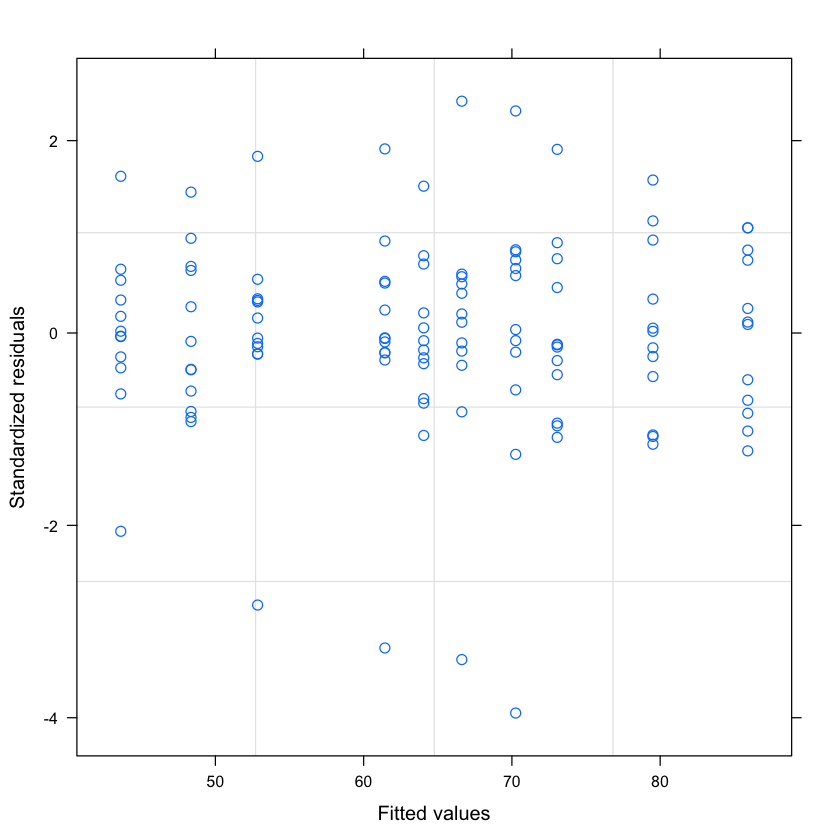

In [7]:
# fit assuming compound symmetry
fit.plearn <- gls(per_corr ~ group * as.factor(trial), data = plearn, corr = corCompSymm(, form= ~ 1 | subj), method = "ML" )
summary(fit.plearn)
anova(fit.plearn)
anova(fit.plearn,type = "marginal")
coef(fit.plearn)
plot(fit.plearn)

In [10]:
fit.plearnar1 <- gls(per_corr ~ group * trial, data = plearn, corr = corAR1(, form= ~ 1 | subj), method = "ML" )
anova(fit.plearn, fit.plearnar1)

,call,Model,df,AIC,BIC,logLik
fit.plearn,"gls(model = per_corr ~ group * as.factor(trial), data = plearn, correlation = corCompSymm(, form = ~1 | subj), method = ""ML"")",1,12,794.7379,828.1878,-385.3690
fit.plearnar1,"gls(model = per_corr ~ group * trial, data = plearn, correlation = corAR1(, form = ~1 | subj), method = ""ML"")",2,12,771.5843,805.0342,-373.7921


In [11]:
fit.plearnun <- gls(per_corr ~ group * trial, data = plearn, corr = corSymm(, form= ~ 1 | subj), method = "ML" )
anova(fit.plearnar1, fit.plearnun)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
fit.plearnar1,"gls(model = per_corr ~ group * trial, data = plearn, correlation = corAR1(, form = ~1 | subj), method = ""ML"")",1,12,771.5843,805.0342,-373.7921,,NA,NA
fit.plearnun,"gls(model = per_corr ~ group * trial, data = plearn, correlation = corSymm(, form = ~1 | subj), method = ""ML"")",2,21,781.5200,840.0573,-369.7600,1 vs 2,8.064288,0.5276807


In [12]:
summary(fit.plearnar1)

Generalized least squares fit by maximum likelihood
  Model: per_corr ~ group * trial 
  Data: plearn 
       AIC      BIC    logLik
  771.5843 805.0342 -373.7921

Correlation Structure: AR(1)
 Formula: ~1 | subj 
 Parameter estimate(s):
      Phi 
0.9411025 

Coefficients:
                Value Std.Error  t-value p-value
(Intercept)  38.88330  8.751697 4.442943  0.0000
group         4.73613  5.535059 0.855660  0.3940
trial2        2.76187  3.003694 0.919490  0.3599
trial3       10.92356  4.184850 2.610263  0.0103
trial4       14.84708  5.050116 2.939949  0.0040
trial5       15.71725  5.746629 2.735039  0.0073
group:trial2  6.46716  1.899703 3.404299  0.0009
group:trial3  6.88915  2.646731 2.602889  0.0105
group:trial4  8.15486  3.193974 2.553201  0.0120
group:trial5 10.91757  3.634487 3.003883  0.0033

 Correlation: 
             (Intr) group  trial2 trial3 trial4 trial5 grp:t2 grp:t3 grp:t4
group        -0.949                                                        
trial2       -0.17

#### Now treat trial as continuous and run lmer

In [11]:
plearn$trial = as.numeric(plearn$trial)

In [9]:
# run a linear mixed effects model allowing for random intercepts and slopes per subject
plearn_factor = lmer(per_corr ~ as.numeric(trial) * group + (1 + as.numeric(trial)|subj) , data = plearn, REML = F)  # REML = T for comparison)
summary(plearn_factor)
anova(plearn_factor)
coef(plearn_factor)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: per_corr ~ as.numeric(trial) * group + (1 + as.numeric(trial) |  
    subj)
   Data: plearn

     AIC      BIC   logLik deviance df.resid 
   797.9    820.2   -391.0    781.9      112 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5907 -0.5521  0.1090  0.5004  3.1213 

Random effects:
 Groups   Name              Variance Std.Dev. Corr
 subj     (Intercept)       74.522   8.633        
          as.numeric(trial)  2.392   1.546    0.66
 Residual                   17.328   4.163        
Number of obs: 120, groups:  subj, 24

Fixed effects:
                        Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)              34.6773     6.2444 23.9996   5.553 1.03e-05 ***
as.numeric(trial)         4.3520     1.3109 24.0002   3.320  0.00287 ** 
group                     4.1650     3.9493 23.9996   1.055  0.30210    
as.numeric(trial):group   2.3523   

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
as.numeric(trial),190.97337,190.97337,1,24.00024,11.021181,0.002869584
group,19.27237,19.27237,1,23.99958,1.112219,0.302101986
as.numeric(trial):group,139.48275,139.48275,1,24.00024,8.049628,0.009105728


$subj
   (Intercept) as.numeric(trial)    group as.numeric(trial):group
1    37.212445          4.887977 4.165021                2.352285
2    33.827521          3.713180 4.165021                2.352285
3    31.319576          4.653967 4.165021                2.352285
4    33.195315          4.444710 4.165021                2.352285
5    35.954599          5.394261 4.165021                2.352285
6     9.220323         -0.251999 4.165021                2.352285
7    39.784244          5.185100 4.165021                2.352285
8    40.745244          5.254255 4.165021                2.352285
9    32.448390          4.260316 4.165021                2.352285
10   37.460748          4.984656 4.165021                2.352285
11   32.871226          2.683893 4.165021                2.352285
12   52.088342          7.013350 4.165021                2.352285
13   26.393631          3.035788 4.165021                2.352285
14   35.407558          4.269408 4.165021                2.352285
15  

#### Now with the Margarine data

In [13]:
chol_wide = read.csv('data_files//chlo2_dat.txt')
chol_wide$ID = as.factor(chol_wide$ID)
chol_wide$Margarine = as.factor(chol_wide$Margarine)
head(chol_wide)
dim(chol_wide)

ID,Before,After4weeks,After8weeks,Margarine
1,6.42,5.83,5.75,B
2,6.76,6.20,6.13,A
3,6.56,5.83,5.71,B
4,4.80,4.27,4.15,A
5,8.43,7.71,7.67,B
6,7.49,7.12,7.05,A


[1] 18  5

ID,Margarine,phase,measurement
1,B,Before,6.42
2,A,Before,6.76
3,B,Before,6.56
4,A,Before,4.80
5,B,Before,8.43
6,A,Before,7.49


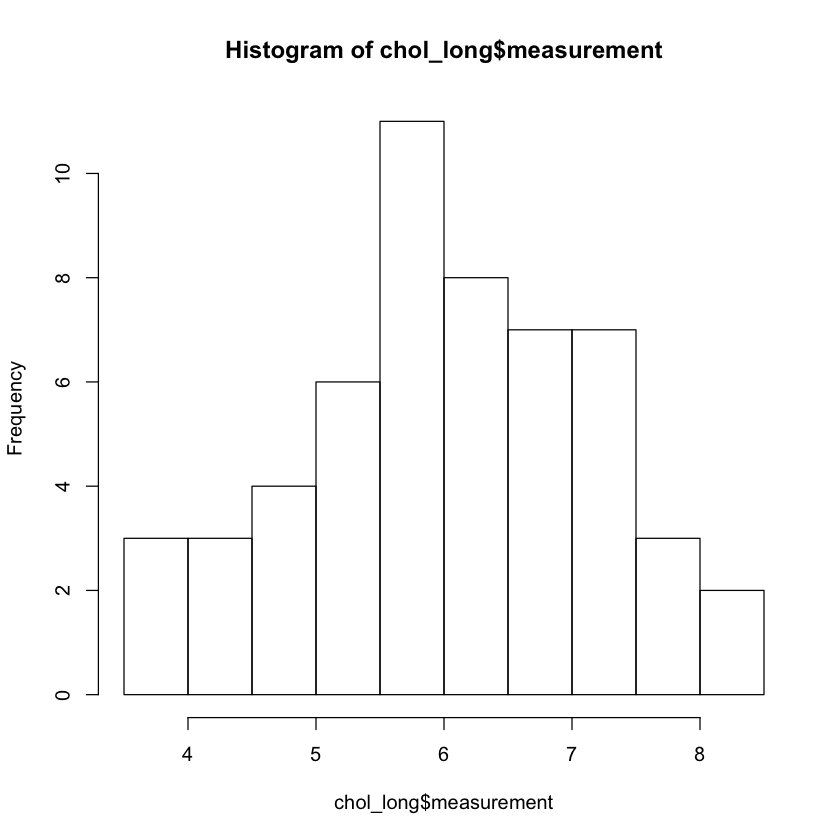

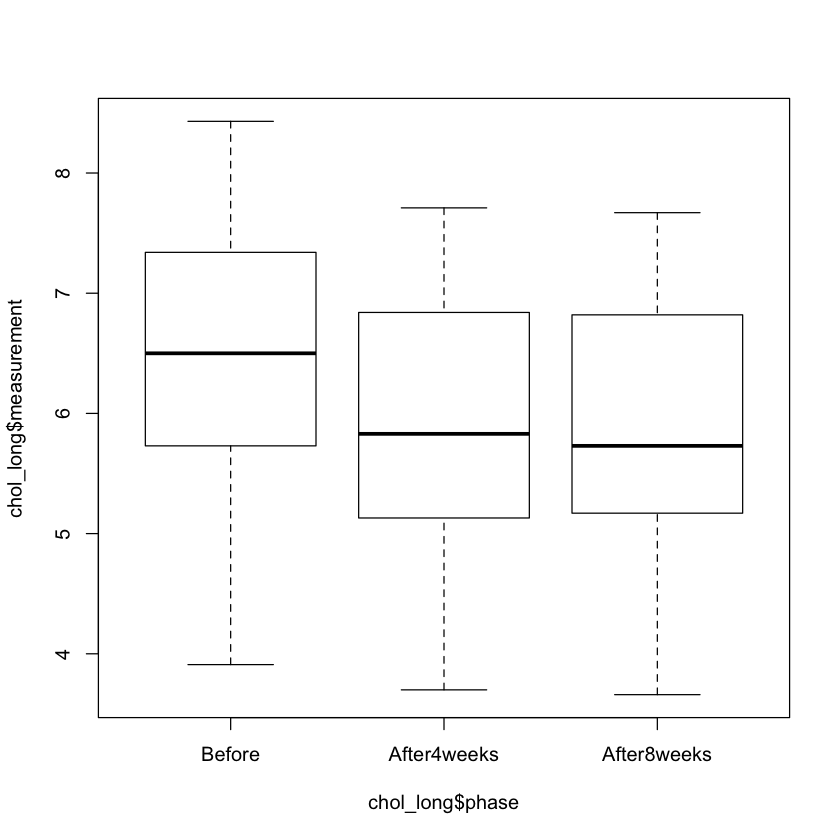

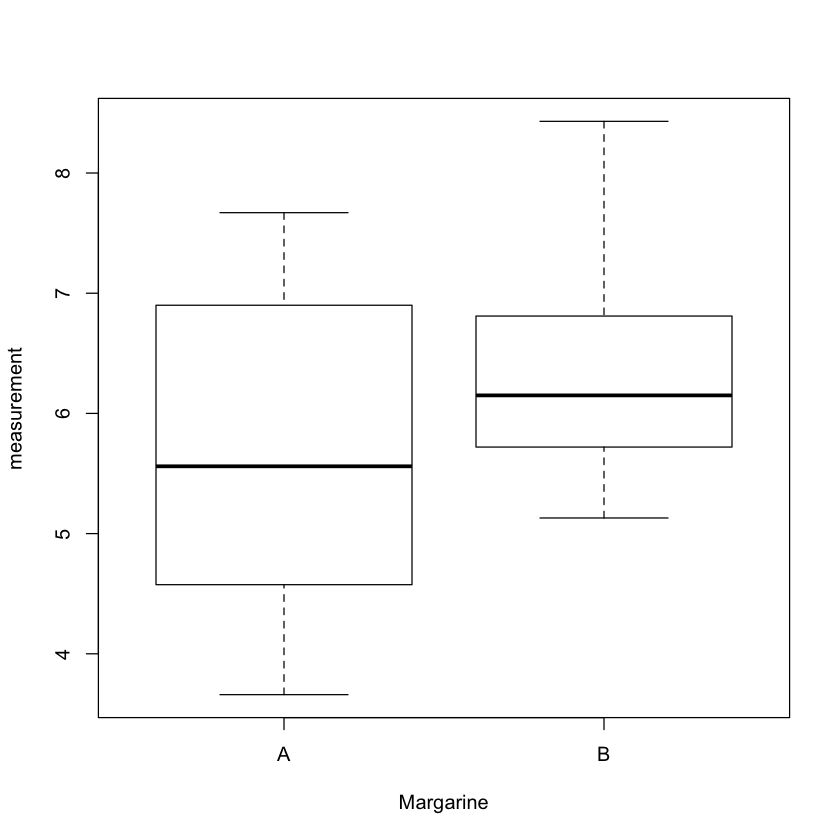

In [14]:
# make long format
chol_long <- gather(chol_wide, phase, measurement, Before:After8weeks, factor_key=TRUE)
chol_long$phase = as.factor(chol_long$phase)
head(chol_long)
hist(chol_long$measurement)
plot(chol_long$measurement ~ chol_long$phase)
boxplot(measurement ~ Margarine, data=chol_long)

In [38]:
# look at covariance structure across trials
var(chol_wide[2:4])
cor(chol_wide[2:4])
dim(chol_long)

,Before,After4weeks,After8weeks
Before,1.418689,1.328204,1.300515
After4weeks,1.328204,1.261921,1.235584
After8weeks,1.300515,1.235584,1.214210


,Before,After4weeks,After8weeks
Before,1.0000000,0.9926706,0.9908885
After4weeks,0.9926706,1.0000000,0.9981812
After8weeks,0.9908885,0.9981812,1.0000000


[1] 54  4

Generalized least squares fit by maximum likelihood
  Model: measurement ~ Margarine * phase 
  Data: chol_long 
       AIC      BIC    logLik
  14.40454 30.31641 0.7977303

Correlation Structure: Compound symmetry
 Formula: ~1 | ID 
 Parameter estimate(s):
      Rho 
0.9934153 

Coefficients:
                                Value Std.Error    t-value p-value
(Intercept)                  6.035556 0.3747621  16.105030  0.0000
MargarineB                   0.744444 0.5299937   1.404629  0.1666
phaseAfter4weeks            -0.485556 0.0430068 -11.290191  0.0000
phaseAfter8weeks            -0.546667 0.0430068 -12.711153  0.0000
MargarineB:phaseAfter4weeks -0.161111 0.0608209  -2.648945  0.0109
MargarineB:phaseAfter8weeks -0.164444 0.0608209  -2.703750  0.0095

 Correlation: 
                            (Intr) MrgrnB phsAf4 phsAf8 MrB:A4
MargarineB                  -0.707                            
phaseAfter4weeks            -0.057  0.041                     
phaseAfter8weeks            -0.

,numDF,F-value,p-value
(Intercept),1,516.532776,2.436686e-27
Margarine,1,1.446047,2.350619e-01
phase,2,259.489728,1.837274e-26
Margarine:phase,2,4.776725,1.282558e-02


,numDF,F-value,p-value
(Intercept),1,259.371999,5.497702e-21
Margarine,1,1.972982,1.665701e-01
phase,2,97.020324,1.369211e-17
Margarine:phase,2,4.776725,1.282558e-02


(Intercept)                  MargarineB 
                  6.0355556                   0.7444444 
           phaseAfter4weeks            phaseAfter8weeks 
                 -0.4855556                  -0.5466667 
MargarineB:phaseAfter4weeks MargarineB:phaseAfter8weeks 
                 -0.1611111                  -0.1644444

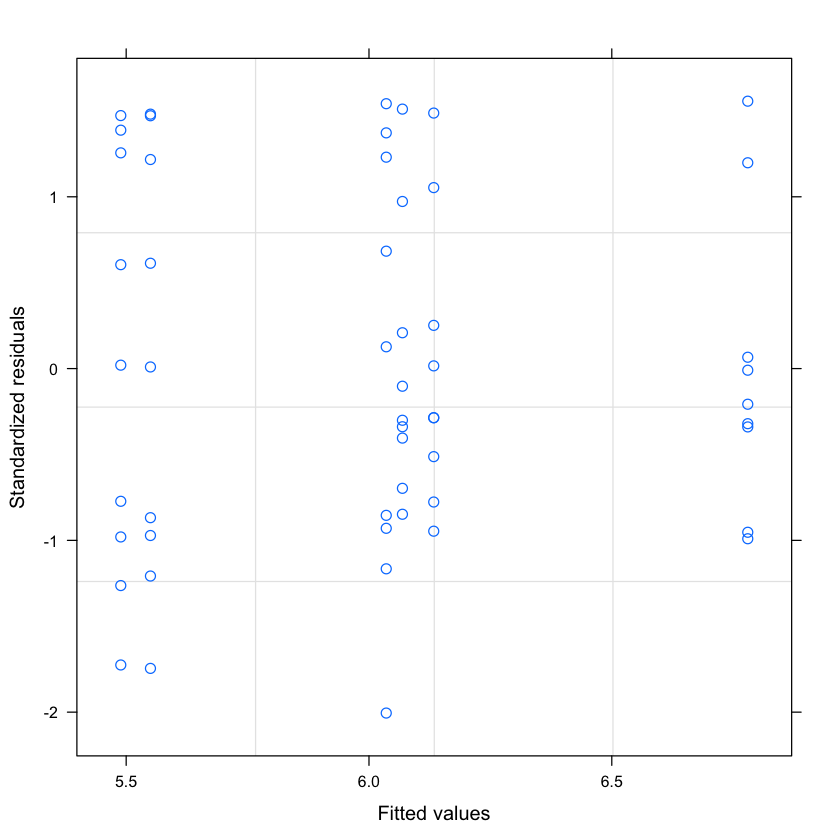

In [15]:
# fit assuming compound symmetry
fit.marg <- gls(measurement ~ Margarine * phase, data = chol_long, corr = corCompSymm(, form= ~ 1 | ID), method = "ML" )
summary(fit.marg)
anova(fit.marg)
anova(fit.marg,type = "marginal")
coef(fit.marg)
plot(fit.marg)

In [16]:
fit.margar1 <- gls(measurement ~ Margarine * phase, data = chol_long, corr = corAR1(, form= ~ 1 | ID), method = "ML" )
anova(fit.marg, fit.margar1)
summary(fit.margar1)

,call,Model,df,AIC,BIC,logLik
fit.marg,"gls(model = measurement ~ Margarine * phase, data = chol_long, correlation = corCompSymm(, form = ~1 | ID), method = ""ML"")",1,8,14.404539,30.31641,0.7977303
fit.margar1,"gls(model = measurement ~ Margarine * phase, data = chol_long, correlation = corAR1(, form = ~1 | ID), method = ""ML"")",2,8,7.451311,23.36318,4.2743446


Generalized least squares fit by maximum likelihood
  Model: measurement ~ Margarine * phase 
  Data: chol_long 
       AIC      BIC   logLik
  7.451311 23.36318 4.274345

Correlation Structure: AR(1)
 Formula: ~1 | ID 
 Parameter estimate(s):
      Phi 
0.9953501 

Coefficients:
                                Value Std.Error    t-value p-value
(Intercept)                  6.035556 0.3761435  16.045885  0.0000
MargarineB                   0.744444 0.5319473   1.399470  0.1681
phaseAfter4weeks            -0.485556 0.0362736 -13.385916  0.0000
phaseAfter8weeks            -0.546667 0.0512390 -10.668963  0.0000
MargarineB:phaseAfter4weeks -0.161111 0.0512986  -3.140651  0.0029
MargarineB:phaseAfter8weeks -0.164444 0.0724628  -2.269362  0.0278

 Correlation: 
                            (Intr) MrgrnB phsAf4 phsAf8 MrB:A4
MargarineB                  -0.707                            
phaseAfter4weeks            -0.048  0.034                     
phaseAfter8weeks            -0.068  0.048  0.

In [17]:
fit.margun <- gls(measurement ~ Margarine * phase, data = chol_long, corr = corSymm(, form= ~ 1 | ID), method = "ML" )
anova(fit.margar1, fit.margun)
summary(fit.margun)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
fit.margar1,"gls(model = measurement ~ Margarine * phase, data = chol_long, correlation = corAR1(, form = ~1 | ID), method = ""ML"")",1,8,7.451311,23.36318,4.274345,,NA,NA
fit.margun,"gls(model = measurement ~ Margarine * phase, data = chol_long, correlation = corSymm(, form = ~1 | ID), method = ""ML"")",2,10,4.476541,24.36638,7.761729,1 vs 2,6.97477,0.03058074


Generalized least squares fit by maximum likelihood
  Model: measurement ~ Margarine * phase 
  Data: chol_long 
       AIC      BIC   logLik
  4.476541 24.36638 7.761729

Correlation Structure: General
 Formula: ~1 | ID 
 Parameter estimate(s):
 Correlation: 
  1     2    
2 0.993      
3 0.990 0.998

Coefficients:
                                Value Std.Error    t-value p-value
(Intercept)                  6.035556 0.3758783  16.057206  0.0000
MargarineB                   0.744444 0.5315722   1.400458  0.1678
phaseAfter4weeks            -0.485556 0.0453364 -10.710049  0.0000
phaseAfter8weeks            -0.546667 0.0541685 -10.091968  0.0000
MargarineB:phaseAfter4weeks -0.161111 0.0641154  -2.512830  0.0154
MargarineB:phaseAfter8weeks -0.164444 0.0766058  -2.146631  0.0369

 Correlation: 
                            (Intr) MrgrnB phsAf4 phsAf8 MrB:A4
MargarineB                  -0.707                            
phaseAfter4weeks            -0.060  0.043                     
phaseAft

In [32]:
# specify contrasts for 
b4_vs_after = c(-2, 1, 1)
decrease = c(-1, 0, 1)
contrasts(chol_long$phase) <- cbind(b4_vs_after,decrease)


# run a linear mixed effects model allowing for random intercepts and slopes per subject
marg_lmer = lmer(measurement ~ as.numeric(phase) * Margarine + (1 |ID) , data = chol_long, REML = F)  # REML = T for comparison)
summary(marg_lmer)
anova(marg_lmer)
coef(marg_lmer)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: measurement ~ as.numeric(phase) * Margarine + (1 | ID)
   Data: chol_long

     AIC      BIC   logLik deviance df.resid 
    59.6     71.6    -23.8     47.6       48 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7830 -0.8329  0.1077  0.7028  1.3947 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 1.10897  1.0531  
 Residual             0.02903  0.1704  
Number of obs: 54, groups:  ID, 18

Fixed effects:
                             Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                   6.23815    0.36159 19.89011  17.252 1.97e-13 ***
as.numeric(phase)            -0.27333    0.04016 36.00000  -6.806 5.90e-08 ***
MargarineB                    0.80037    0.51136 19.89011   1.565    0.133    
as.numeric(phase):MargarineB -0.08222    0.05679 36.00000  -1.448    0.156    
---
Signif. codes:  0 ‘***’ 0.001 ‘**

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
as.numeric(phase),3.55951111,3.55951111,1,36.00000,122.619091,3.805592e-13
Margarine,0.07111498,0.07111498,1,19.89011,2.449790,1.333123e-01
as.numeric(phase):Margarine,0.06084444,0.06084444,1,36.00000,2.095987,1.563397e-01


$ID
   (Intercept) as.numeric(phase) MargarineB as.numeric(phase):MargarineB
1     5.913573        -0.2733333  0.8003704                  -0.08222222
2     6.904188        -0.2733333  0.8003704                  -0.08222222
3     5.946618        -0.2733333  0.8003704                  -0.08222222
4     4.964447        -0.2733333  0.8003704                  -0.08222222
5     7.833487        -0.2733333  0.8003704                  -0.08222222
6     7.753445        -0.2733333  0.8003704                  -0.08222222
7     7.367553        -0.2733333  0.8003704                  -0.08222222
8     5.337856        -0.2733333  0.8003704                  -0.08222222
9     5.388157        -0.2733333  0.8003704                  -0.08222222
10    4.320070        -0.2733333  0.8003704                  -0.08222222
11    6.204369        -0.2733333  0.8003704                  -0.08222222
12    5.804524        -0.2733333  0.8003704                  -0.08222222
13    6.292856        -0.2733333  0.8003704    

### 2.	I received the following letter from a medical doctor in Neurology asking me for my blessing What would you tell the doc?

“We asked parents of surgically treated patients to assess the behavioral status before and after surgery. Thus, for instance, we asked whether the patient was depressed before surgery (giving the answer 'yes' or 'no') and after surgery (allowing the choice among 'not anymore', 'yes, but less', 'about the same', and 'worse'). By this, we got the following data:

![title](hw3_img1.png)

Now, I calculated how many did improve, leading to 17 out of 30 [57%] (I did take only the 30 who had depression before surgery because the ones without cannot improve). Similarily, I calculated how many deteriorated, leading to 19 out of 77 [25%] (here I took the whole group because all patients, i.e. the ones with and without preoperative depression, could potentially deteriorate).  Thus, question #1: is this assumption correct?  Question #2: how can I test for significance? I did a chi square test but my colleague is skeptical whether or not this is correct. I have done the following:

![t](hw3_img2.png)

Giving chi square( 2) = 9.8969 with (sic) P=0.0018.